In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import librosa

In [2]:
SAMPLE_RATE = 48000
SEGMENT_DURATION = int(1 * SAMPLE_RATE)
OVERLAP_DURATION = int(0.5 * SAMPLE_RATE)

In [3]:
dir_data_nad = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\noise-audio-data"

In [4]:
def load_and_plot(path, list_result):
    audio, sr = librosa.load(path, sr=SAMPLE_RATE)
    time_axis = np.linspace(0, len(audio) / sr, len(audio))

    plt.figure(figsize=(20, 4))
    plt.plot(time_axis, audio, label="Amplitude")
    # plt.title("Audio waveform with loud segments marked")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    for i in enumerate(list_result):
        start_time = i[1][0]
        end_time = i[1][1]
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)

    plt.xticks(np.arange(0, 6.1, 0.5))
    plt.grid(which='both', alpha=0.5)
    plt.xlim(0, 6)
    plt.ylim(-1, 1)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [5]:
# import os

# for file in os.listdir(dir_data_nad)[:40]:
#     print(f"load_and_plot(dir_data_nad+\"/{file}\", [])")

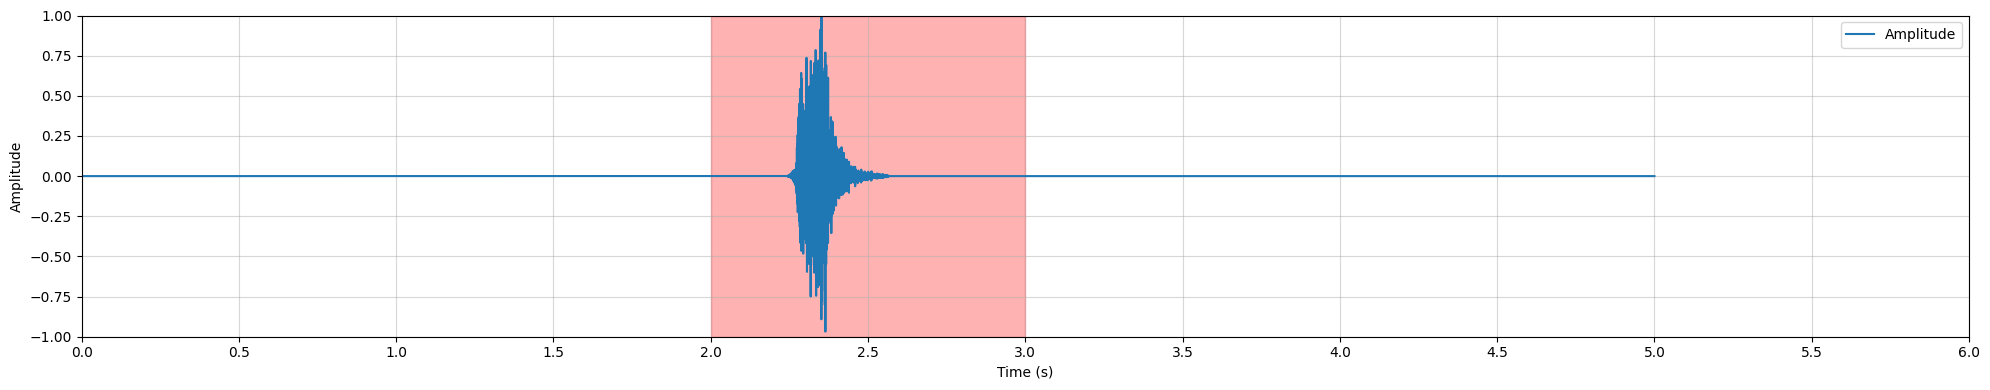

In [6]:
load_and_plot(dir_data_nad+"/1-100032-A-0.wav", [[2.0, 3.0]])

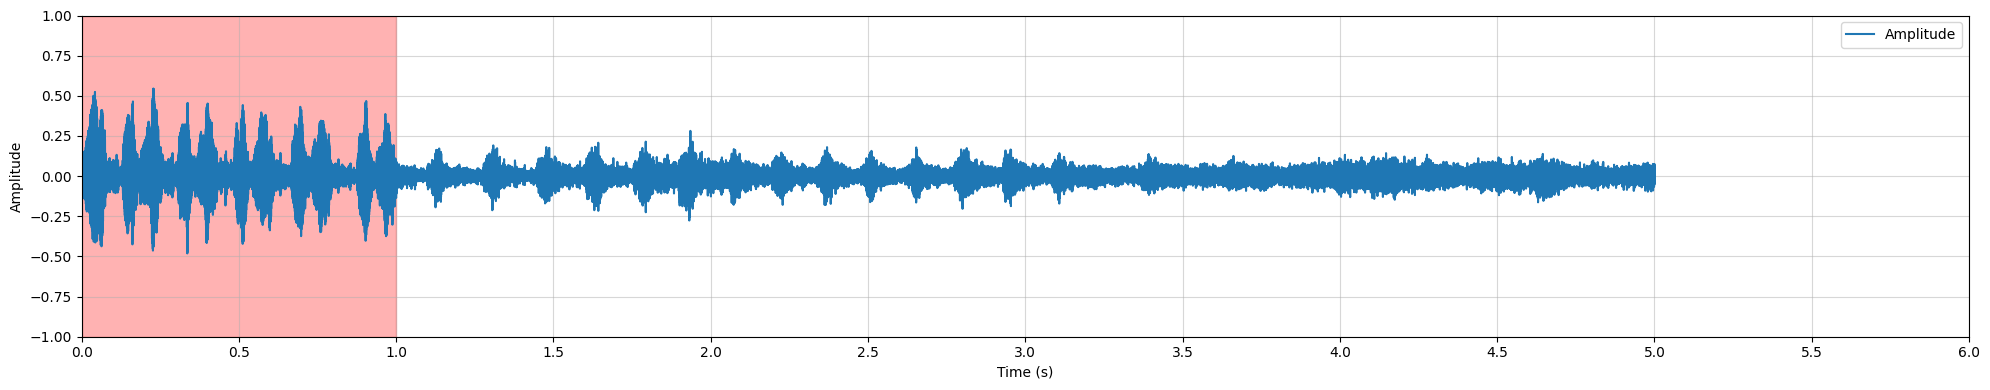

In [7]:
load_and_plot(dir_data_nad+"/1-100038-A-14.wav", [[0.0, 1.0]])

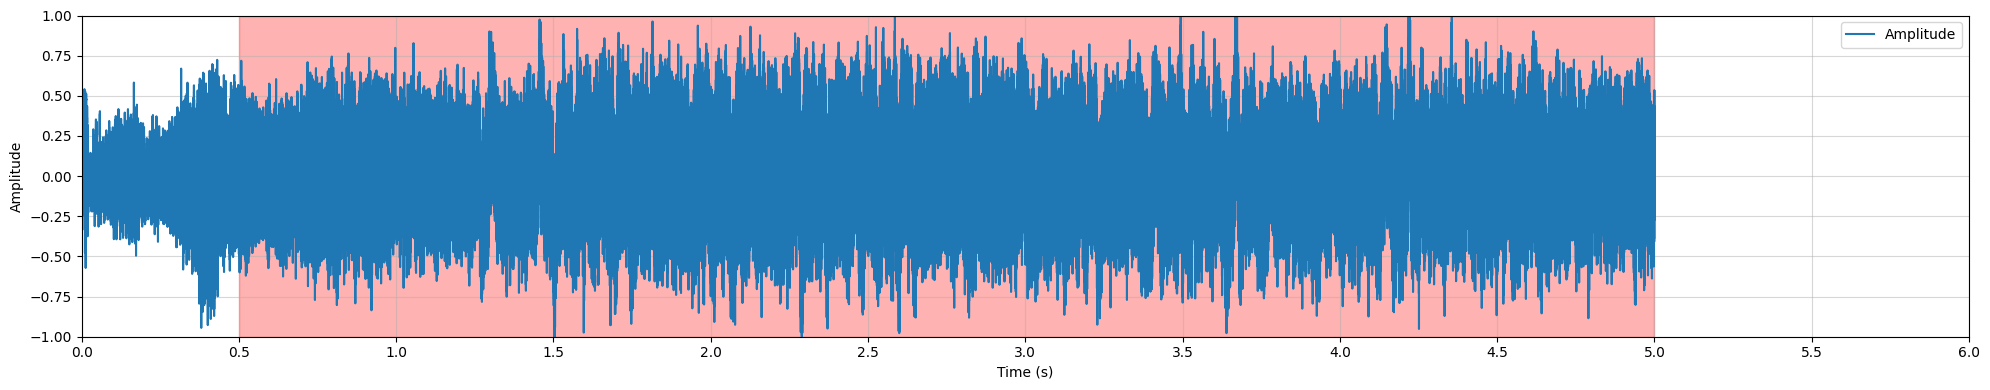

In [8]:
load_and_plot(dir_data_nad+"/1-100210-A-36.wav", [[0.5, 5.0]])

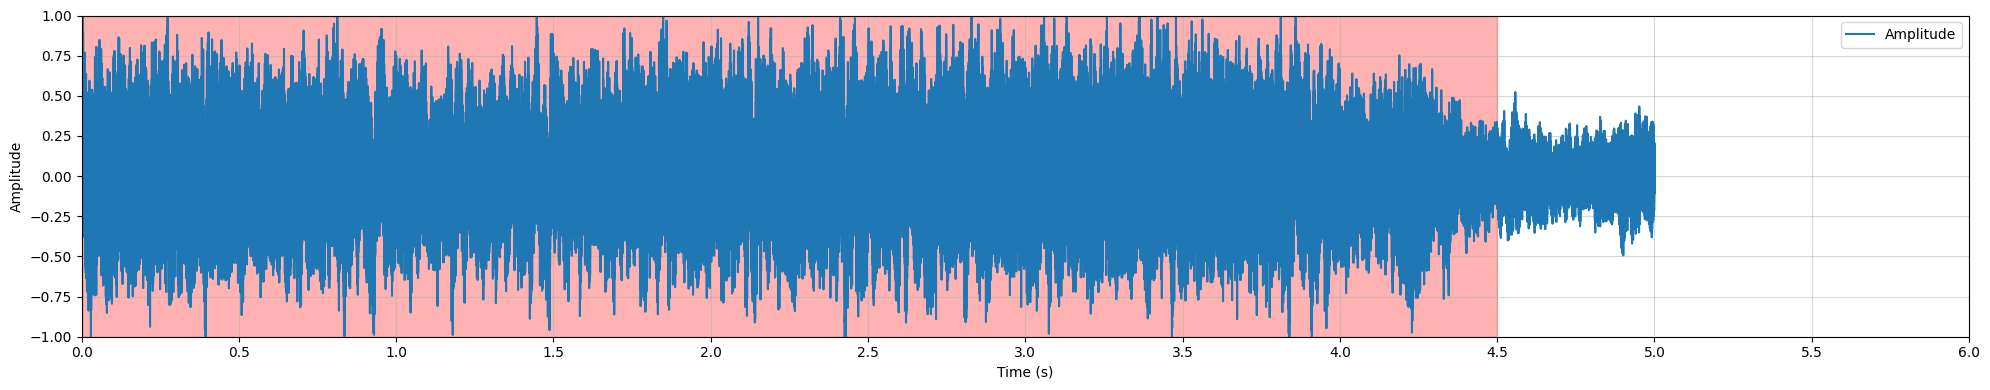

In [9]:
load_and_plot(dir_data_nad+"/1-100210-B-36.wav", [[0.0, 4.5]])

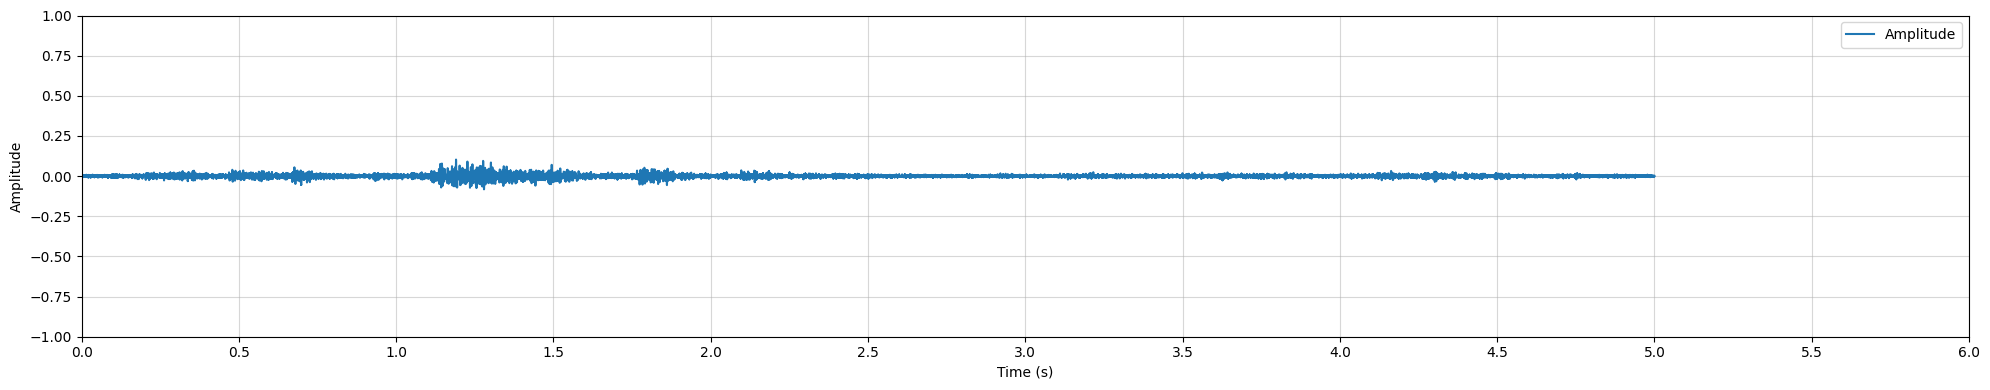

In [10]:
load_and_plot(dir_data_nad+"/1-101296-A-19.wav", [])

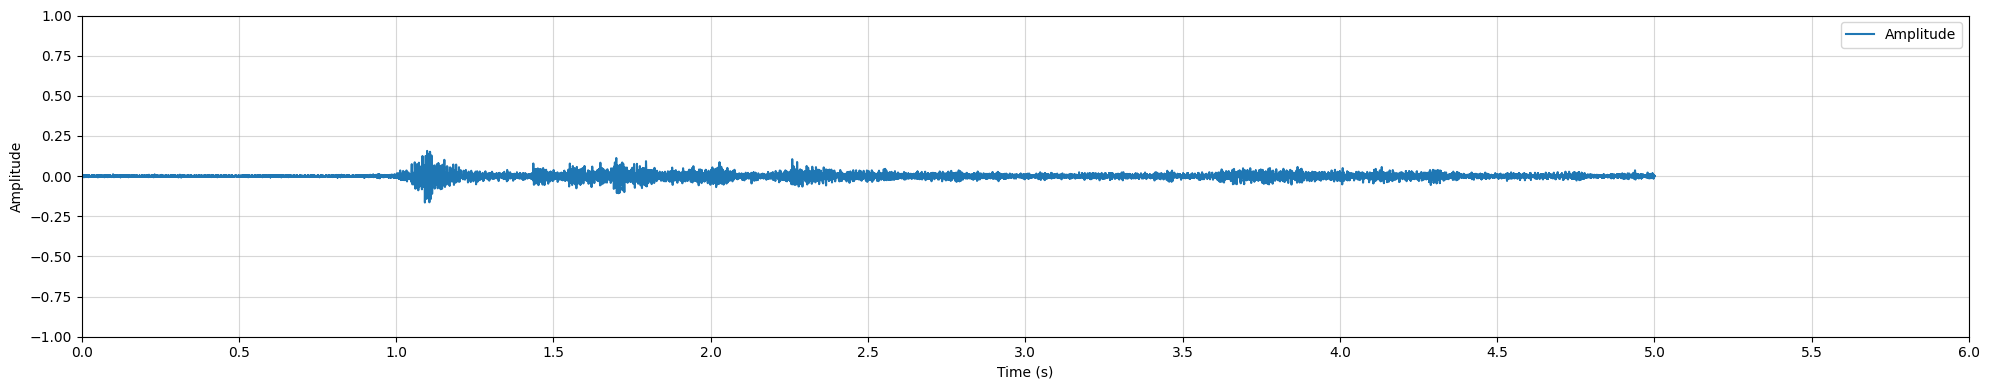

In [11]:
load_and_plot(dir_data_nad+"/1-101296-B-19.wav", [])

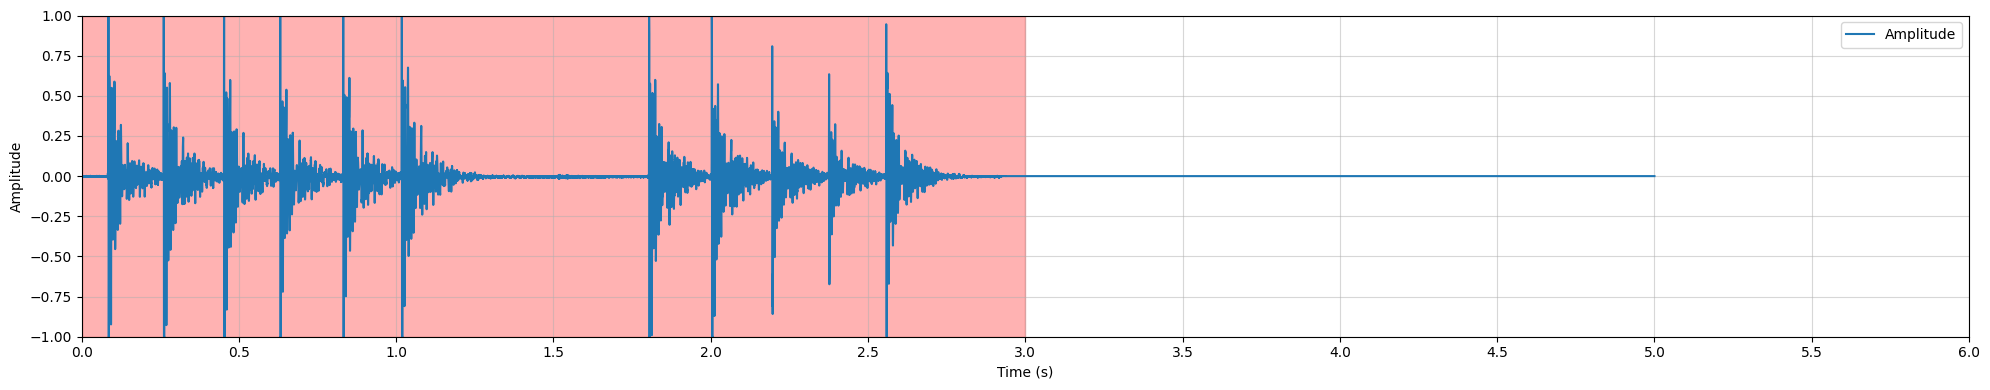

In [12]:
load_and_plot(dir_data_nad+"/1-101336-A-30.wav", [[0.0, 3.0]])

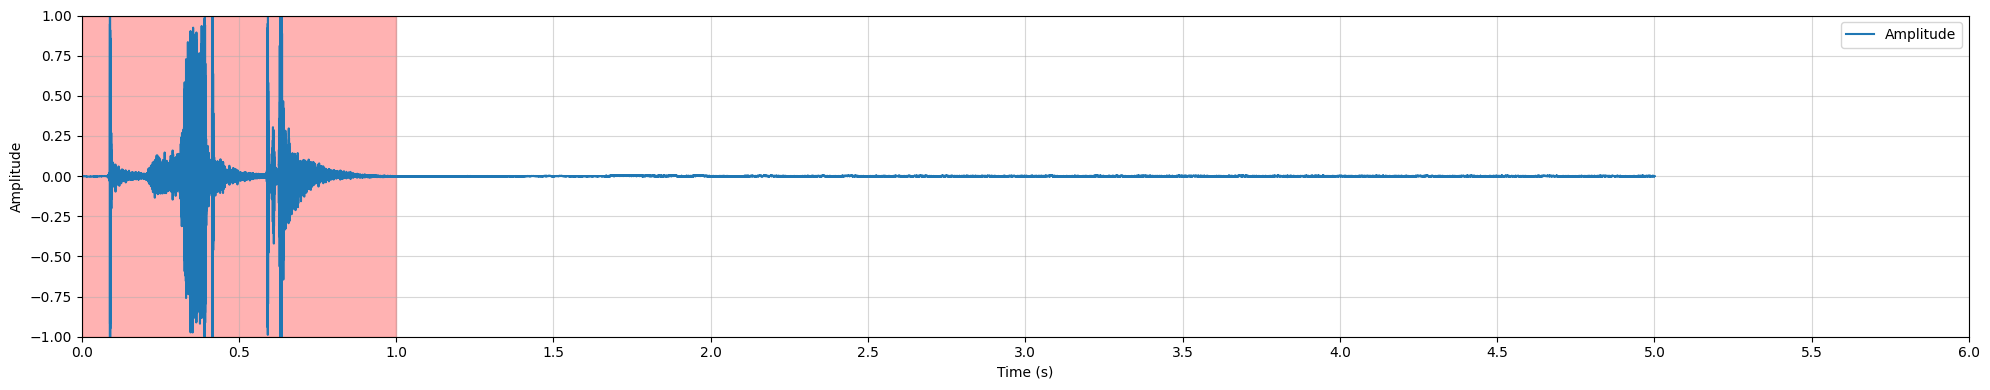

In [13]:
load_and_plot(dir_data_nad+"/1-101404-A-34.wav", [[0.0, 1.0]])

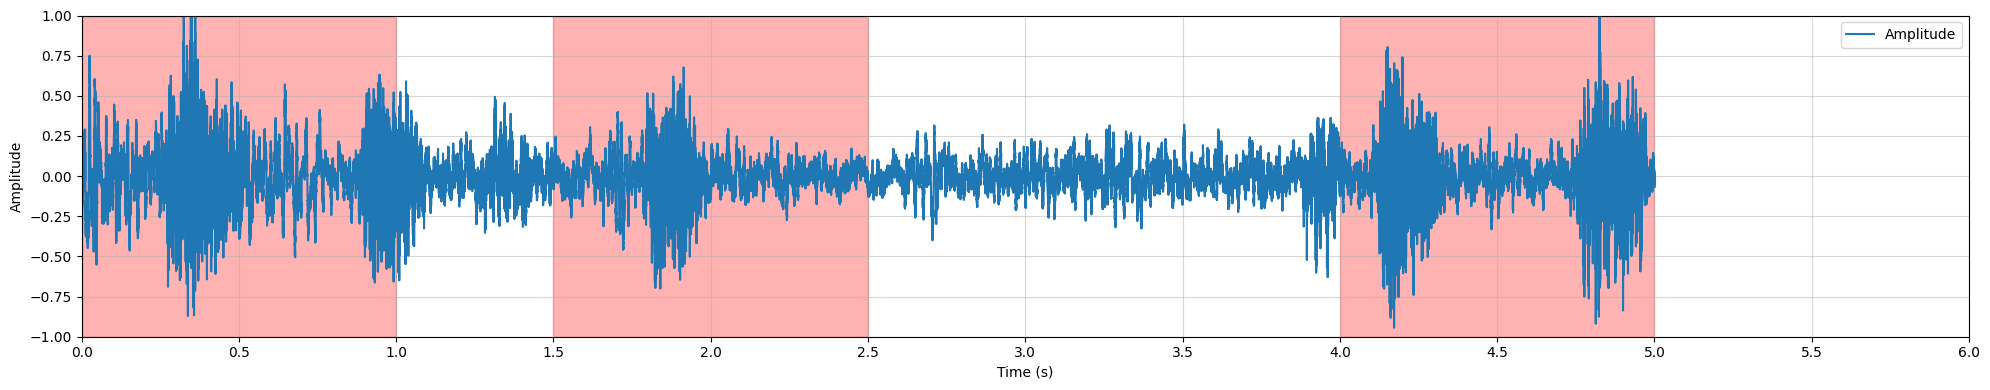

In [14]:
load_and_plot(dir_data_nad+"/1-103298-A-9.wav", [[0.0, 1.0], [1.5, 2.5], [4.0, 5.0]])

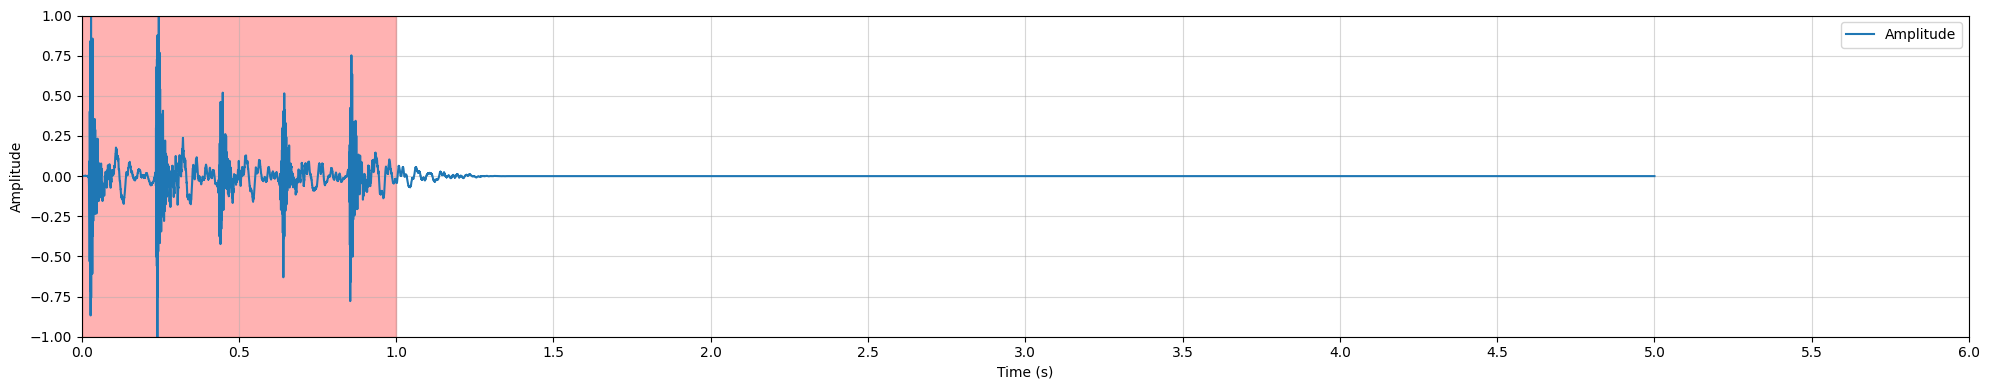

In [15]:
load_and_plot(dir_data_nad+"/1-103995-A-30.wav", [[0.0, 1.0]])

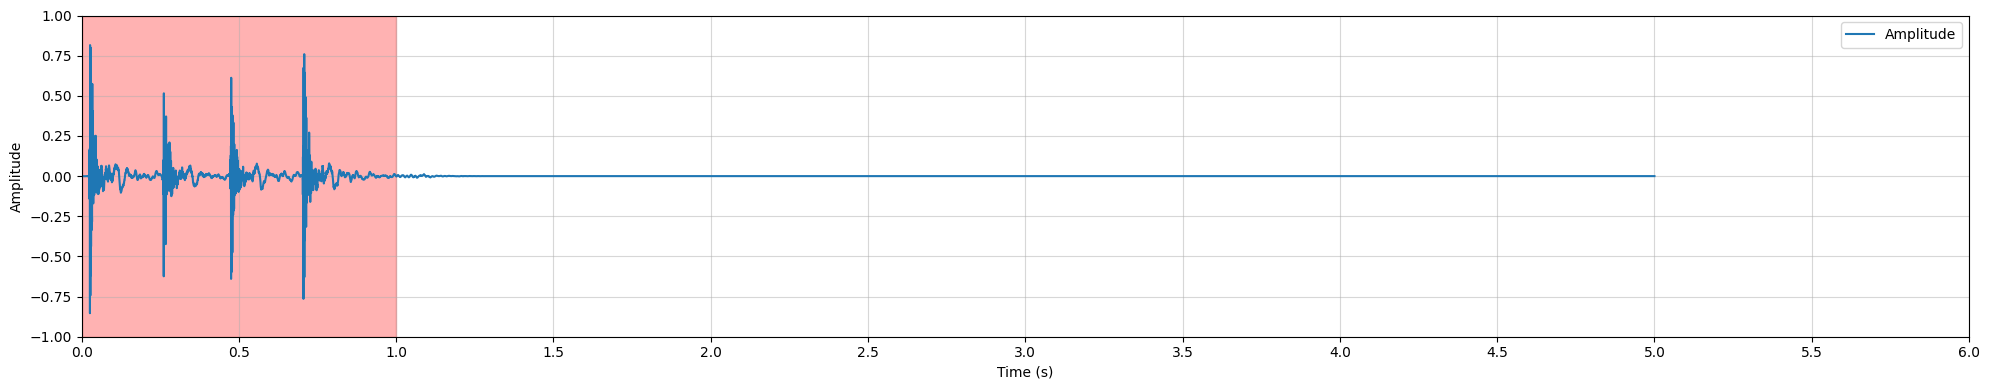

In [16]:
load_and_plot(dir_data_nad+"/1-103999-A-30.wav", [[0.0, 1.0]])

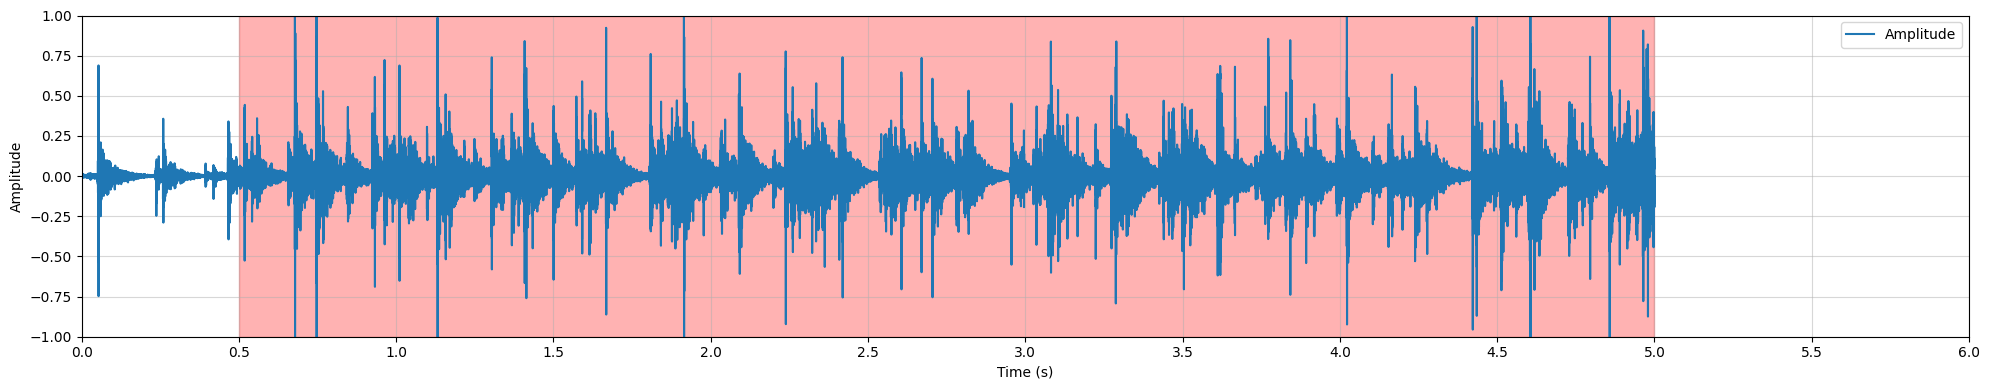

In [17]:
load_and_plot(dir_data_nad+"/1-104089-A-22.wav", [[0.5, 5.0]])

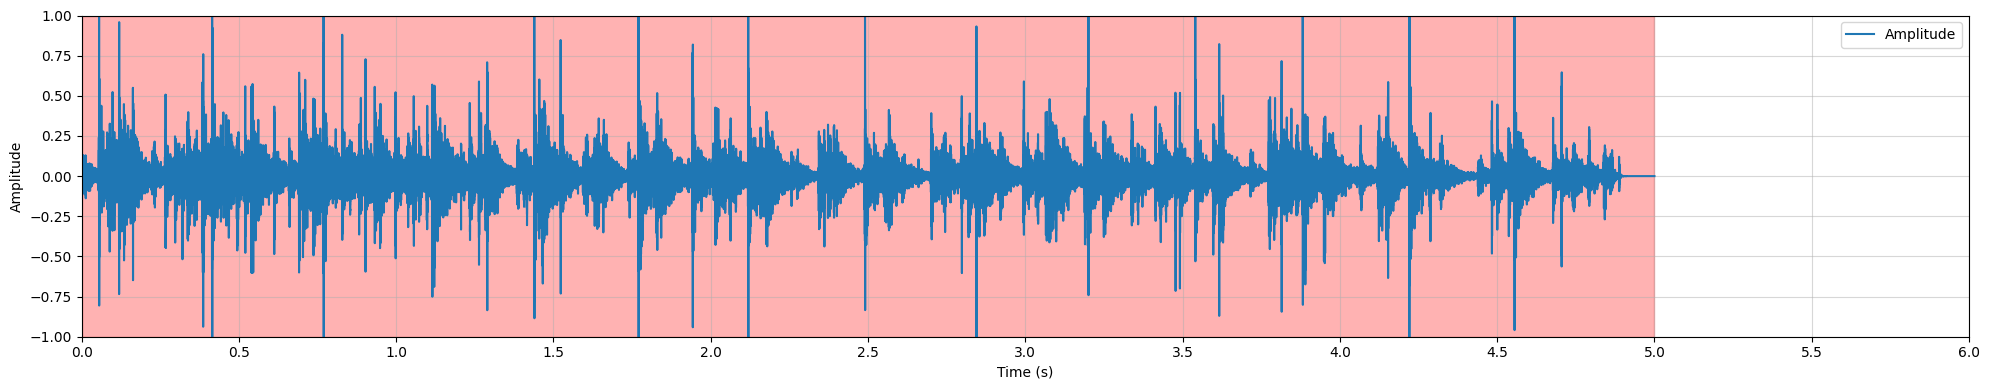

In [18]:
load_and_plot(dir_data_nad+"/1-104089-B-22.wav", [[0.0, 5.0]])

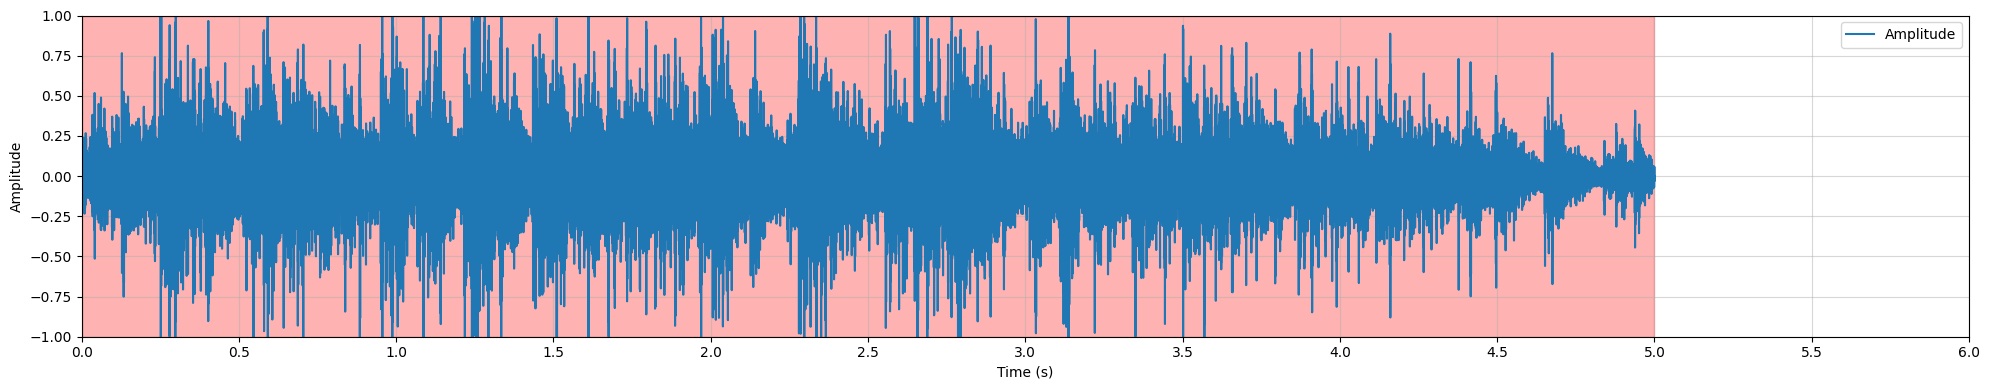

In [19]:
load_and_plot(dir_data_nad+"/1-105224-A-22.wav", [[0.0, 5.0]])

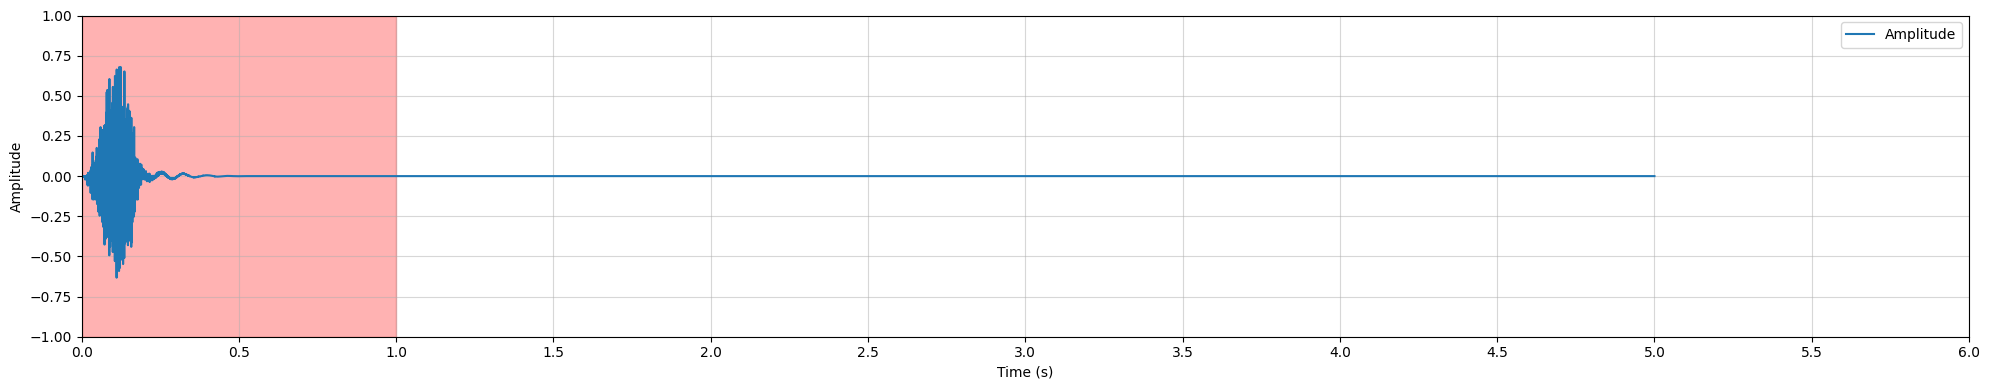

In [20]:
load_and_plot(dir_data_nad+"/1-110389-A-0.wav", [[0.0, 1.0]])

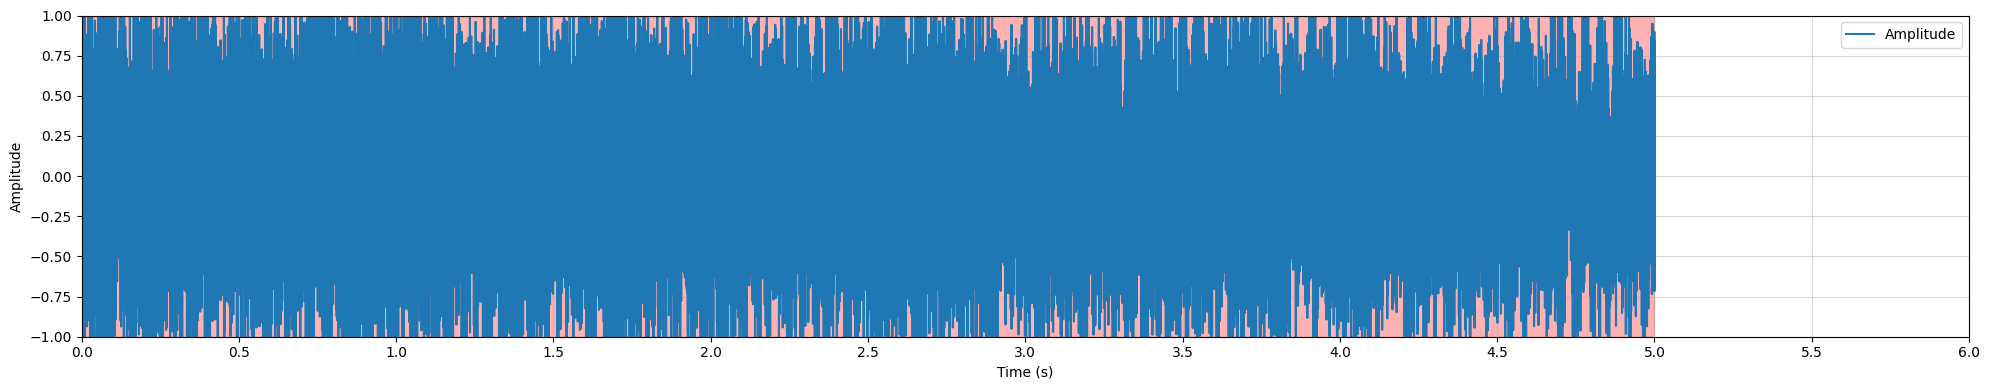

In [21]:
load_and_plot(dir_data_nad+"/1-110537-A-22.wav", [[0.0, 5.0]])

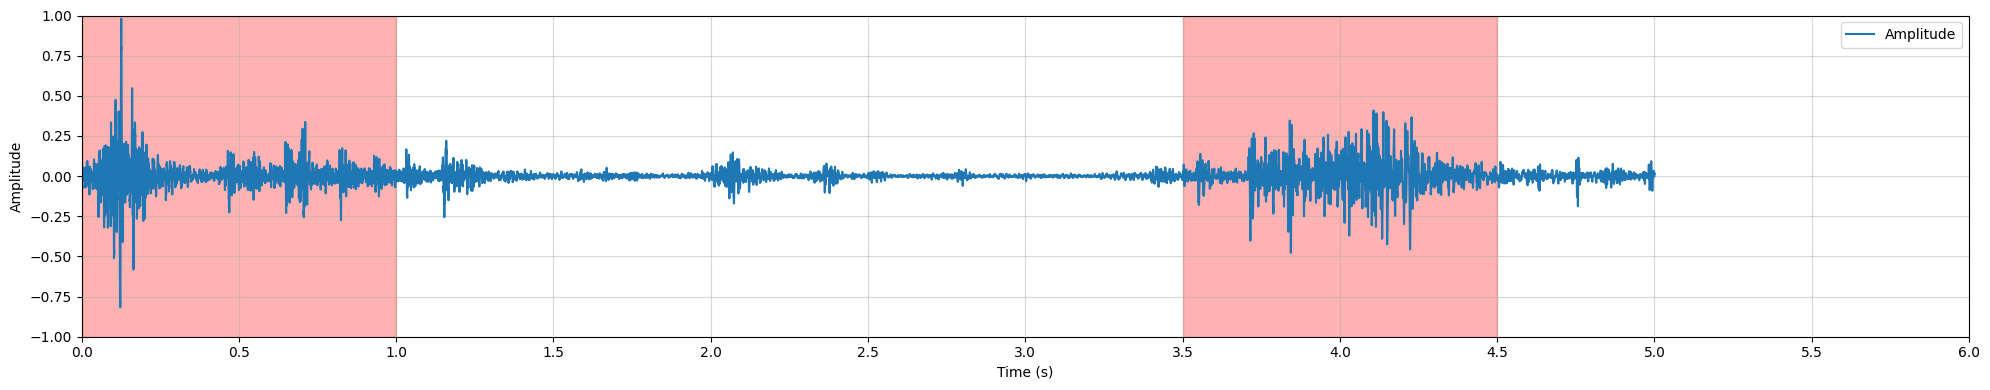

In [22]:
load_and_plot(dir_data_nad+"/1-115521-A-19.wav", [[0.0, 1.0], [3.5, 4.5]])

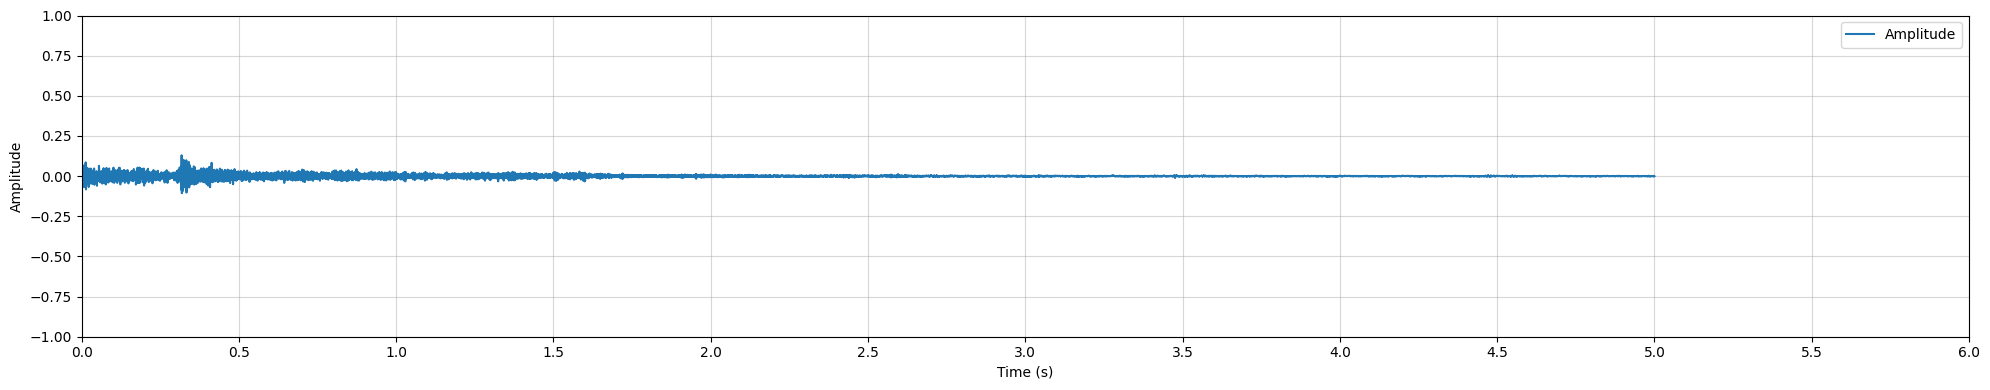

In [23]:
load_and_plot(dir_data_nad+"/1-115545-A-48.wav", [])

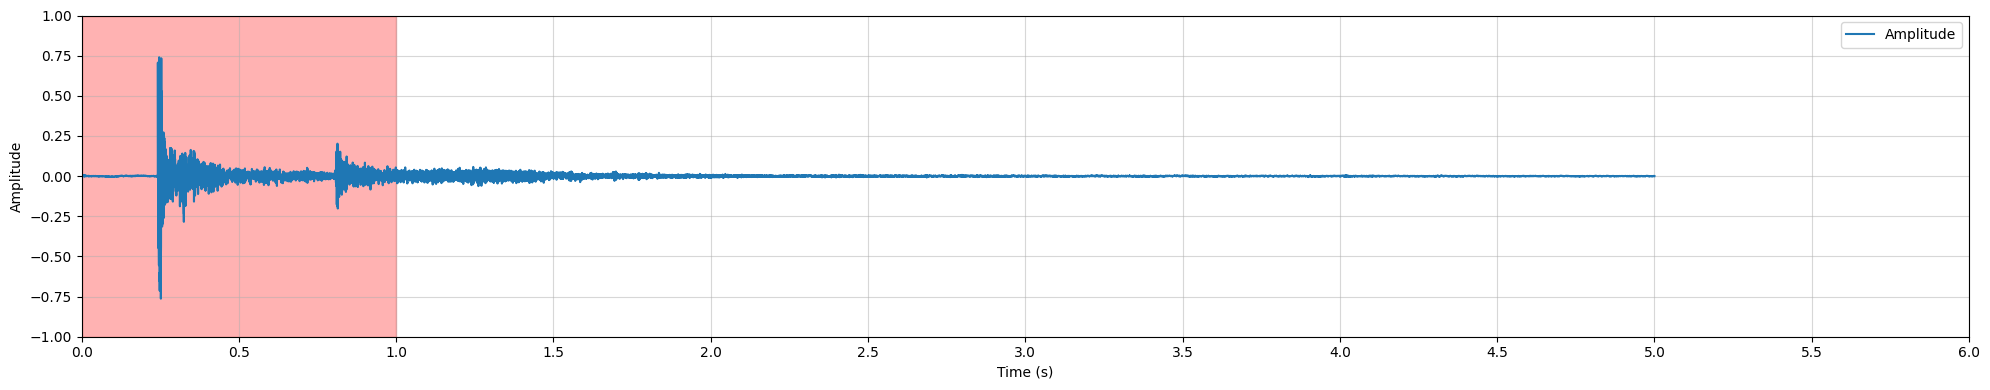

In [24]:
load_and_plot(dir_data_nad+"/1-115545-B-48.wav", [[0.0, 1.0]])

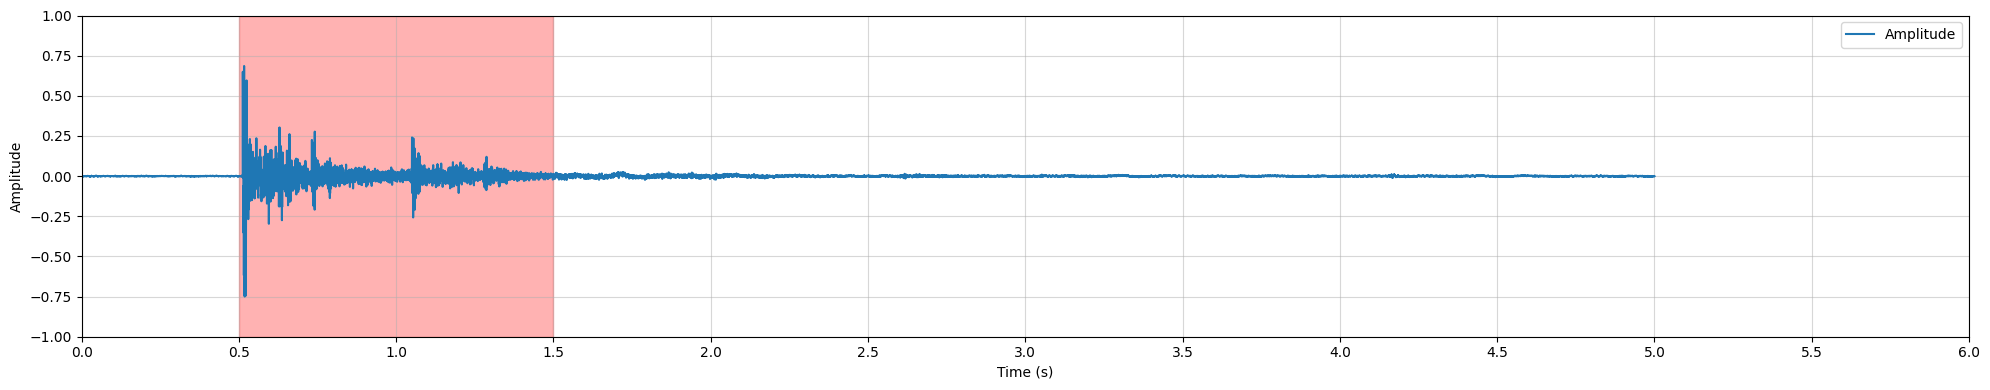

In [25]:
load_and_plot(dir_data_nad+"/1-115545-C-48.wav", [[0.5, 1.5]])

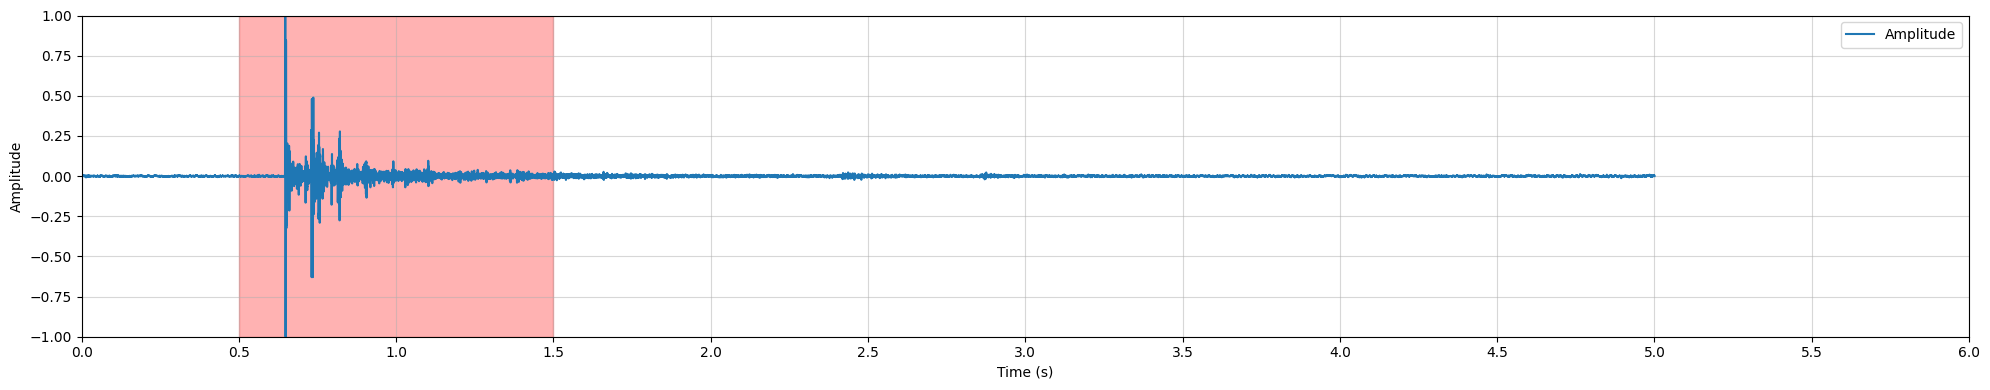

In [26]:
load_and_plot(dir_data_nad+"/1-115546-A-48.wav", [[0.5, 1.5]])

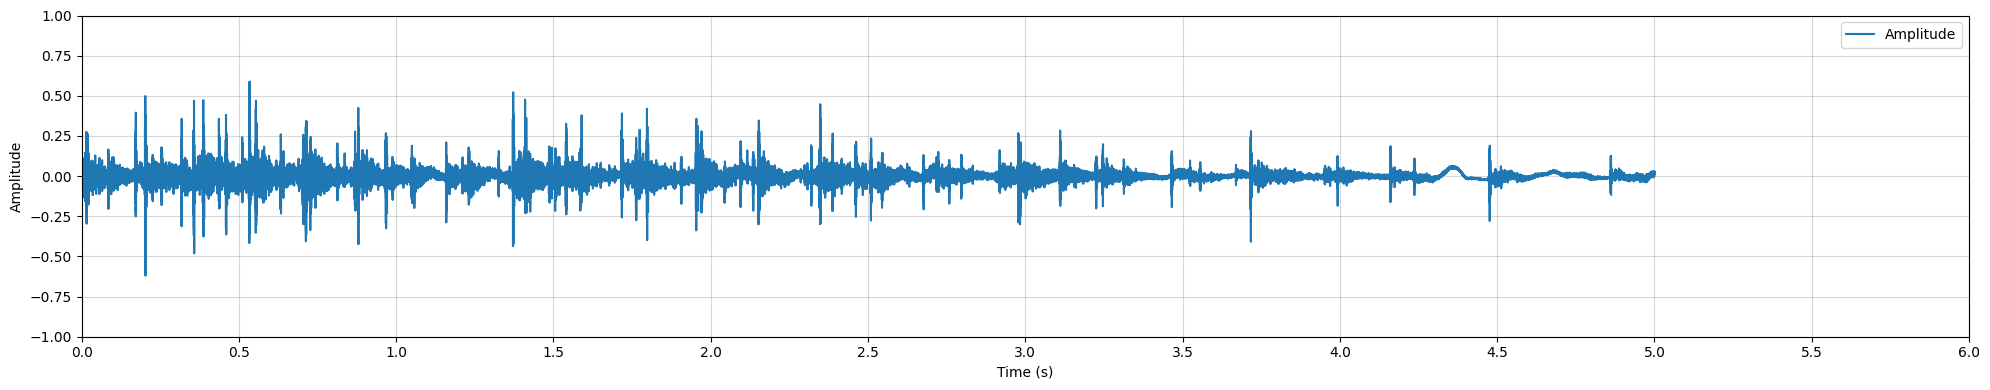

In [27]:
load_and_plot(dir_data_nad+"/1-115920-B-22.wav", [])

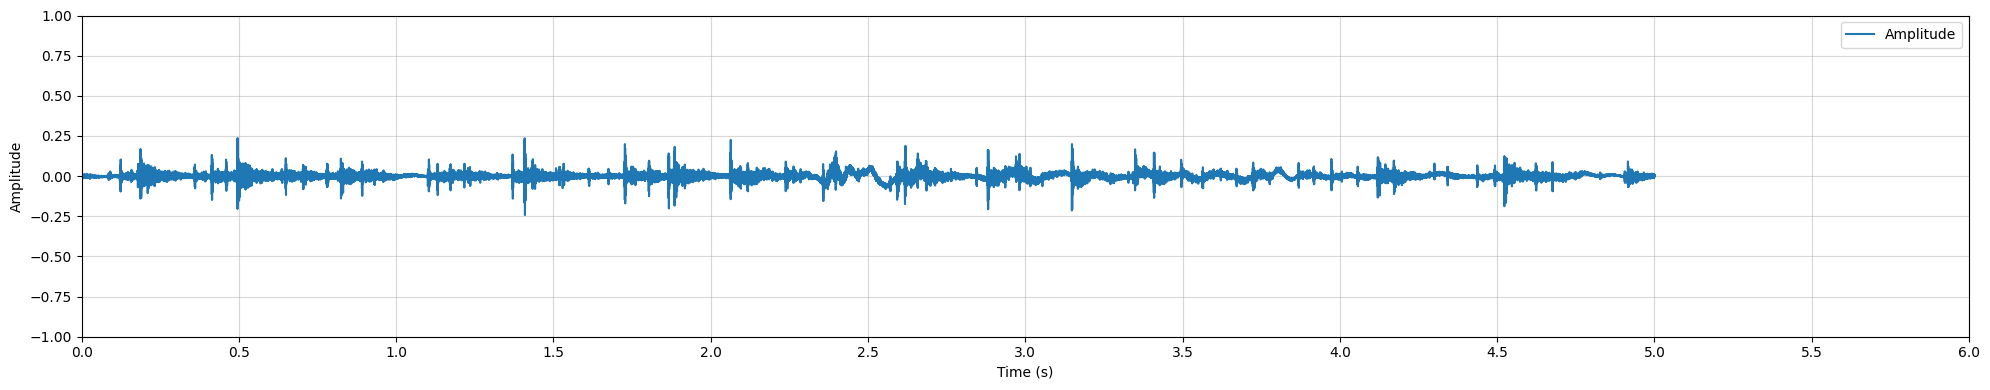

In [28]:
load_and_plot(dir_data_nad+"/1-115921-A-22.wav", [])

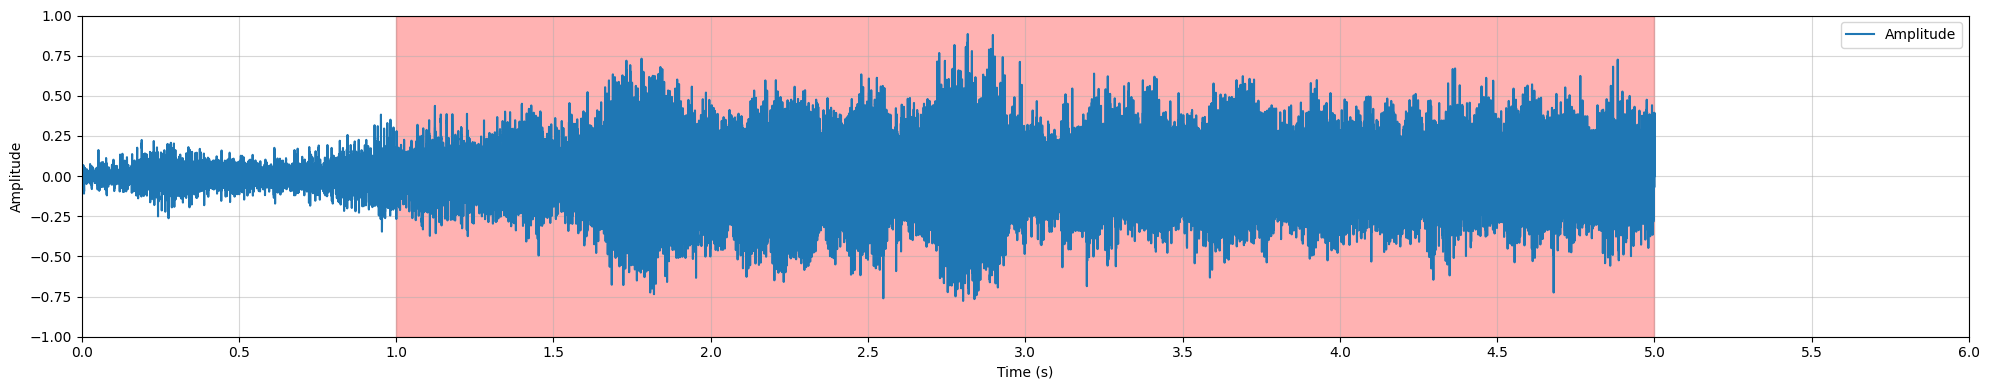

In [29]:
load_and_plot(dir_data_nad+"/1-116765-A-41.wav", [[1.0, 5.0]])

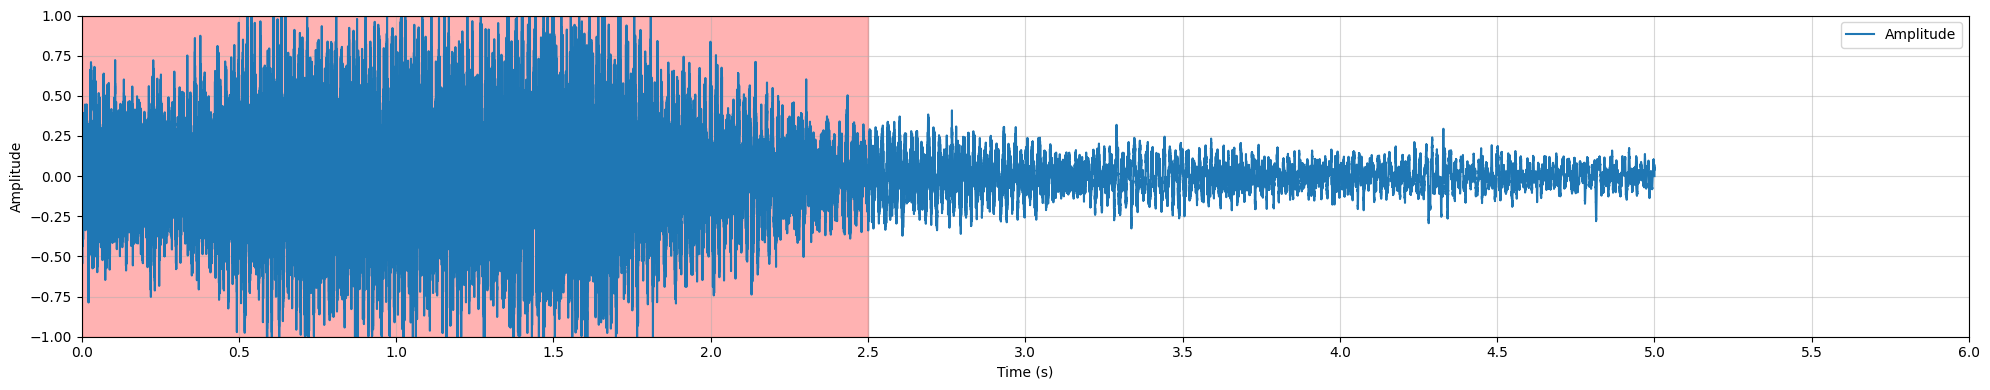

In [30]:
load_and_plot(dir_data_nad+"/1-11687-A-47.wav", [[0.0, 2.5]])

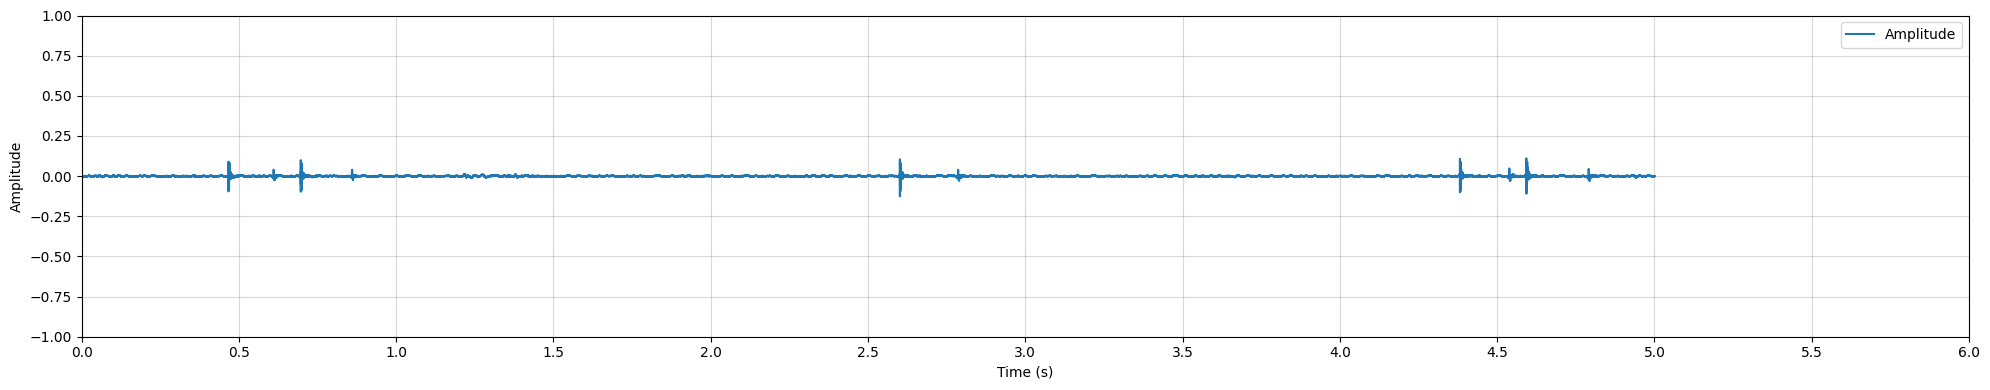

In [31]:
load_and_plot(dir_data_nad+"/1-118206-A-31.wav", [])

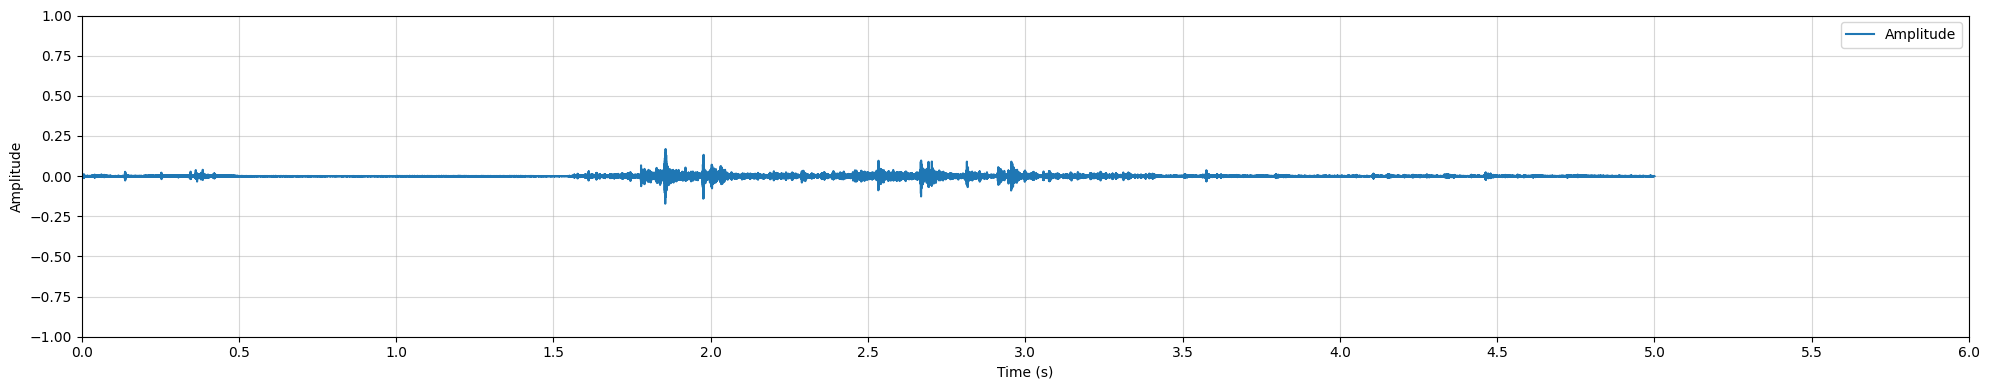

In [32]:
load_and_plot(dir_data_nad+"/1-118559-A-17.wav", [])

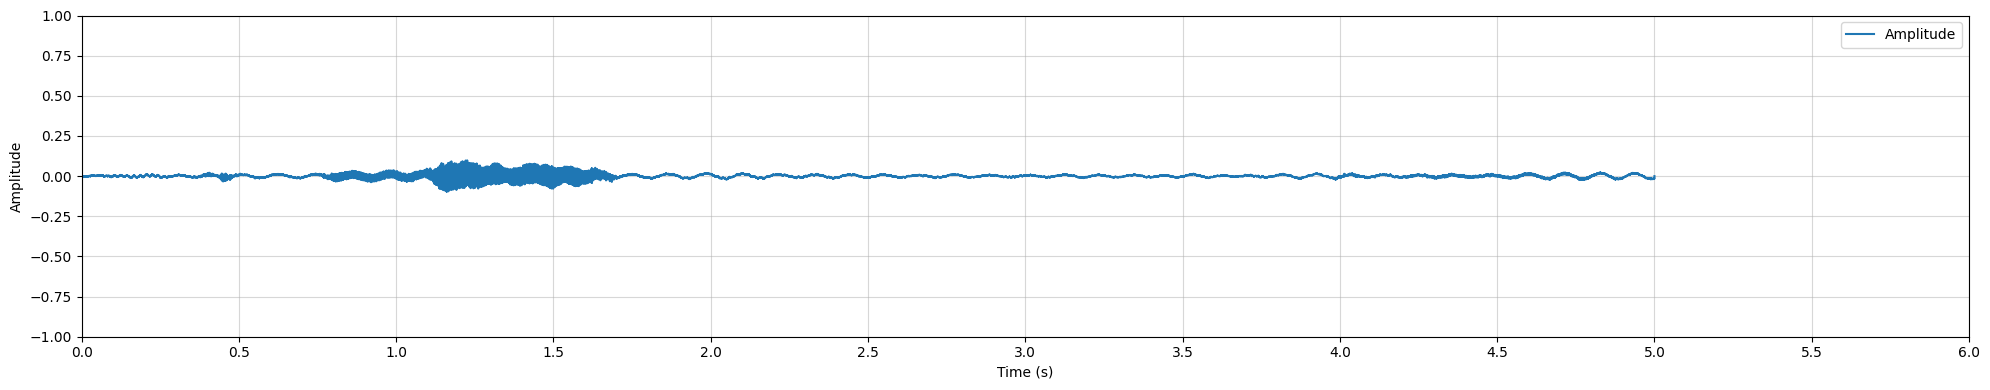

In [33]:
load_and_plot(dir_data_nad+"/1-121951-A-8.wav", [])

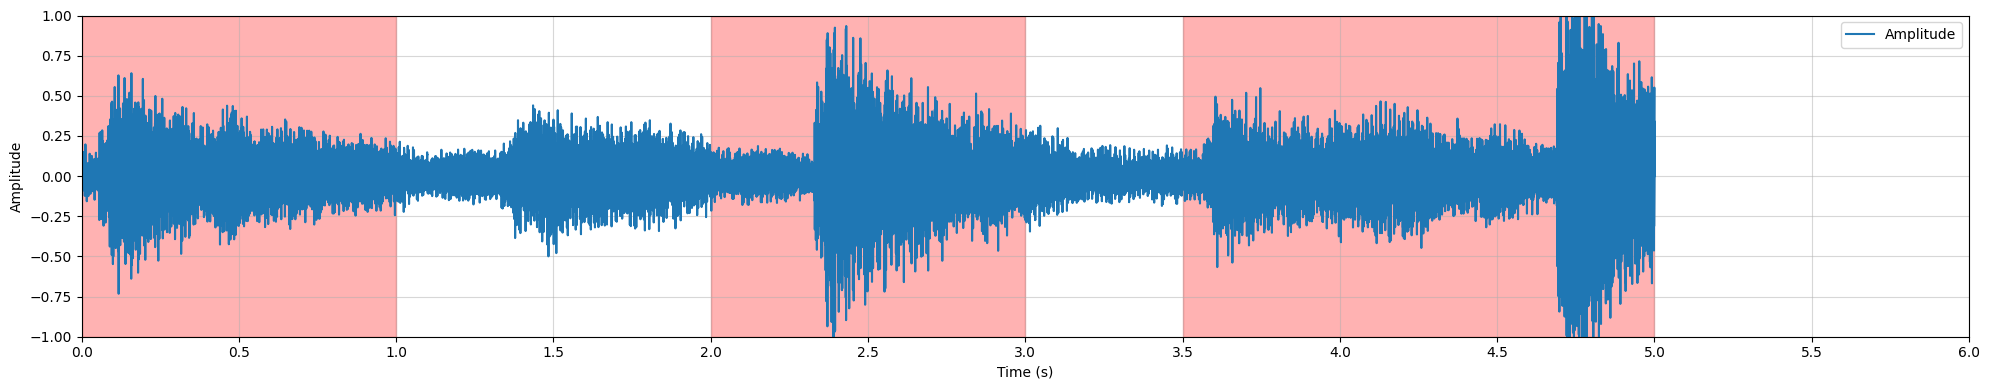

In [34]:
load_and_plot(dir_data_nad+"/1-13571-A-46.wav", [[0.0, 1.0], [2.0, 3.0], [3.5, 5.0]])

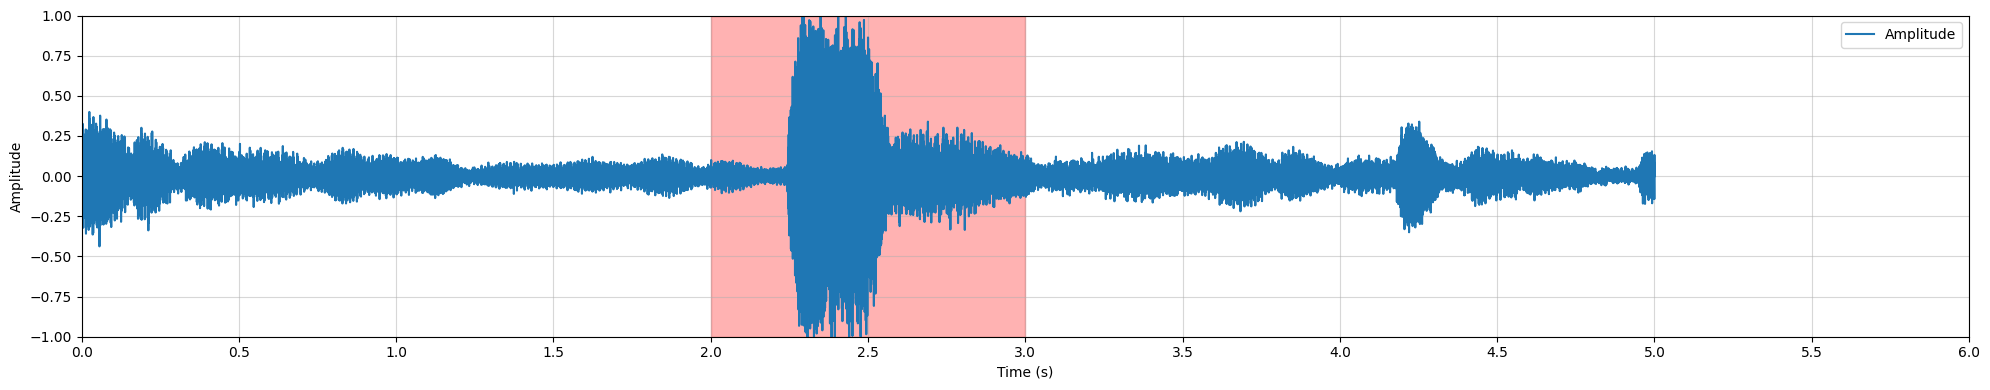

In [35]:
load_and_plot(dir_data_nad+"/1-13572-A-46.wav", [[2.0, 3.0]])

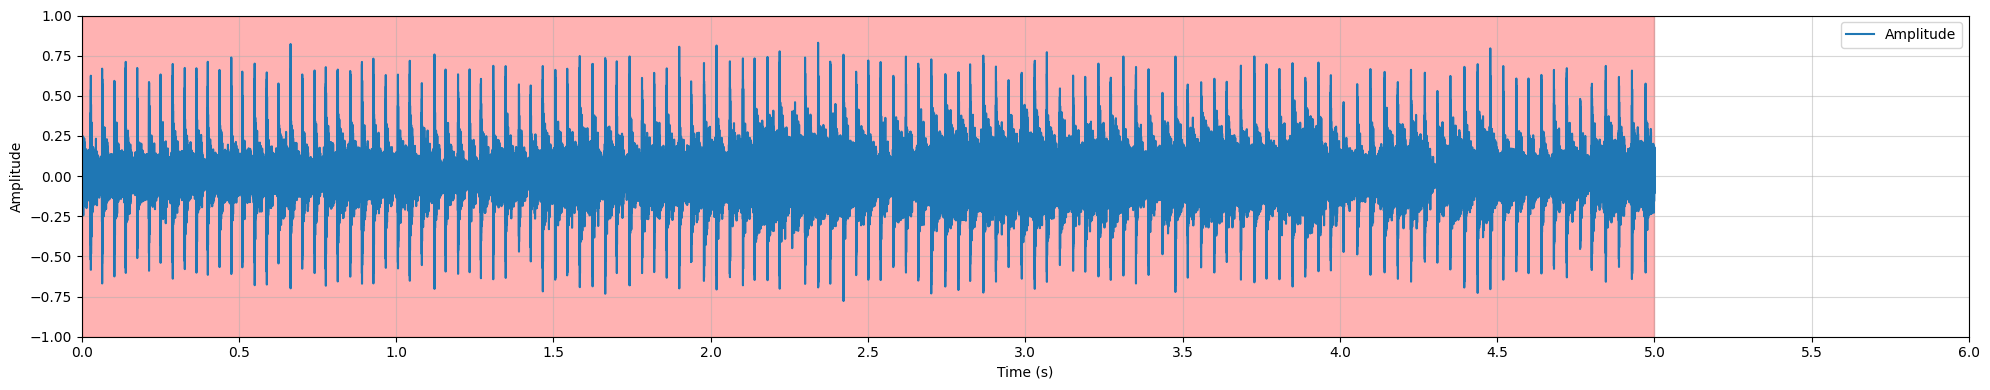

In [36]:
load_and_plot(dir_data_nad+"/1-13613-A-37.wav", [[0.0, 5.0]])

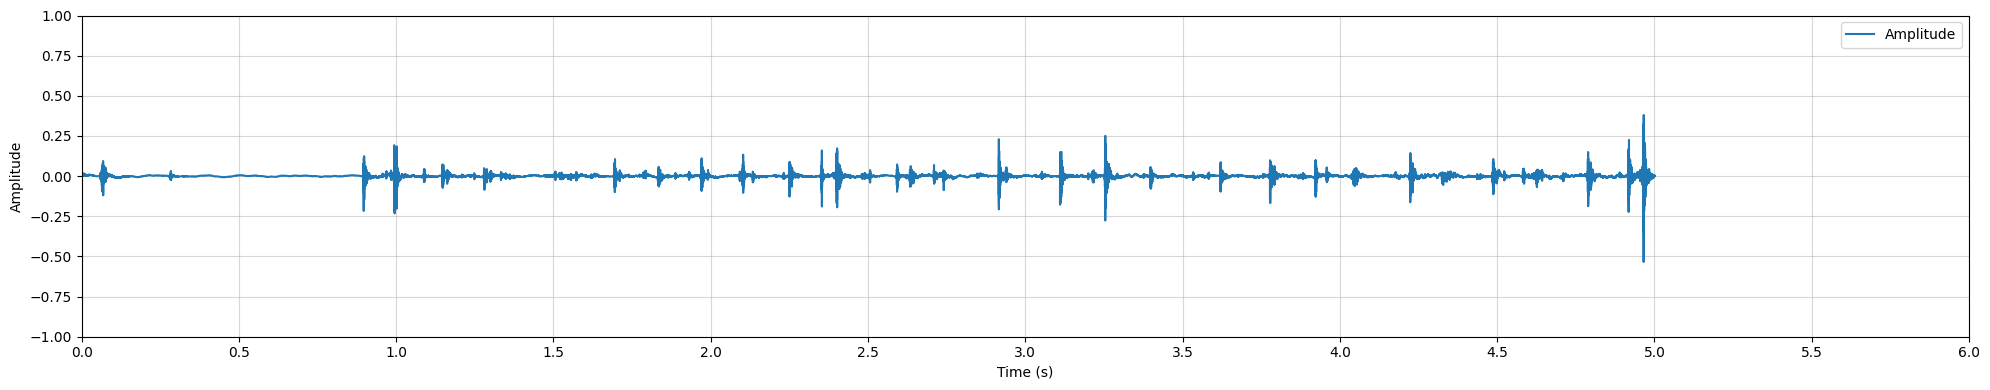

In [37]:
load_and_plot(dir_data_nad+"/1-137-A-32.wav", [])

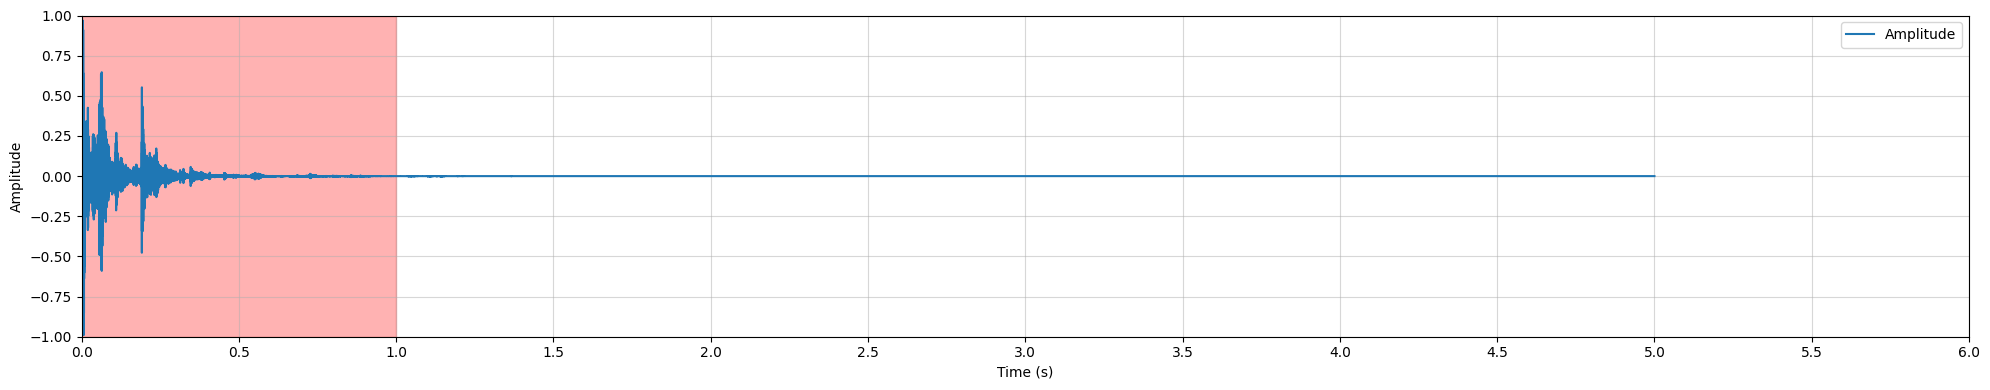

In [38]:
load_and_plot(dir_data_nad+"/1-977-A-39.wav", [[0.0, 1.0]])

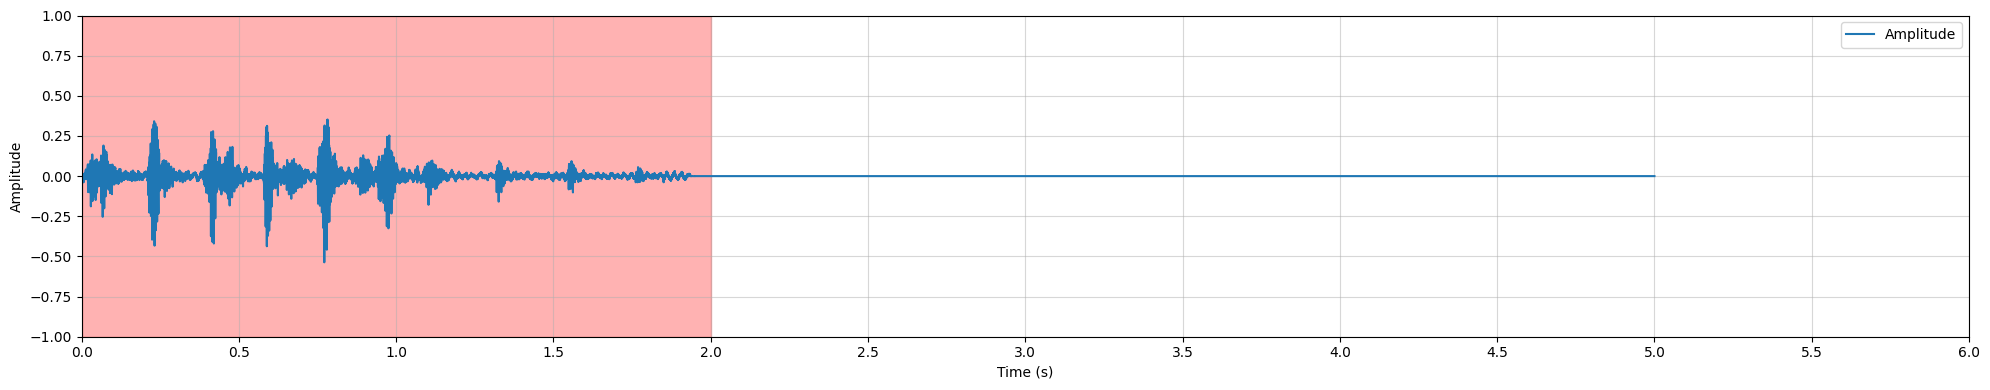

In [39]:
load_and_plot(dir_data_nad+"/1-1791-A-26.wav", [[0.0, 2.0]])

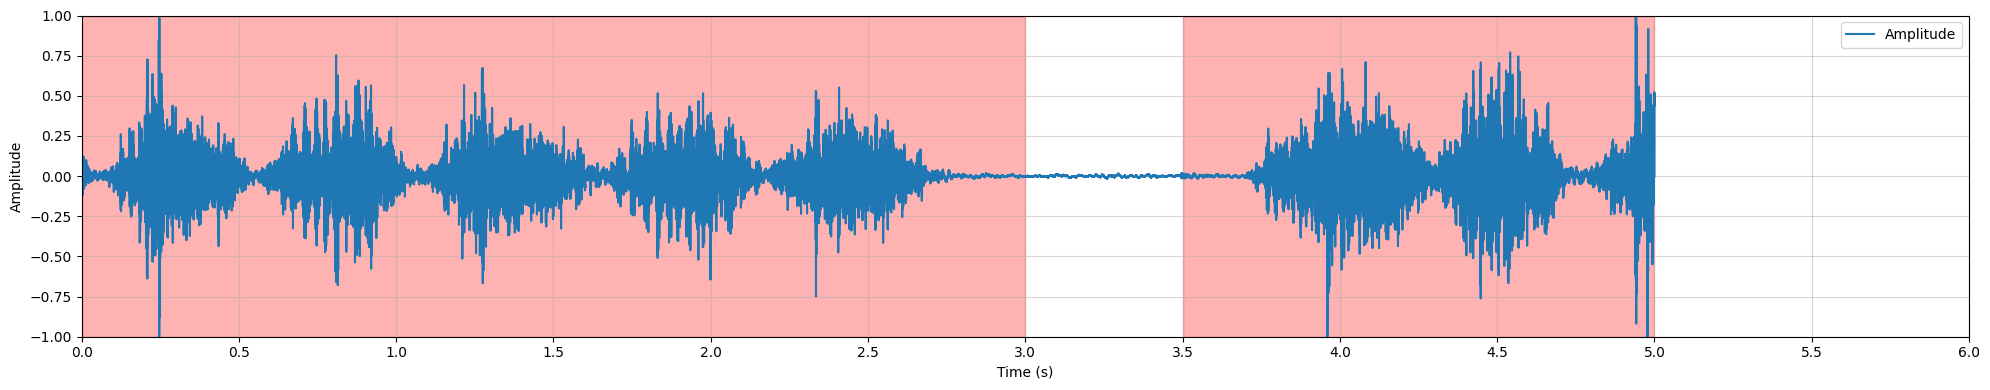

In [40]:
load_and_plot(dir_data_nad+"/1-7974-A-49.wav", [[0.0, 3.0], [3.5, 5.0]])

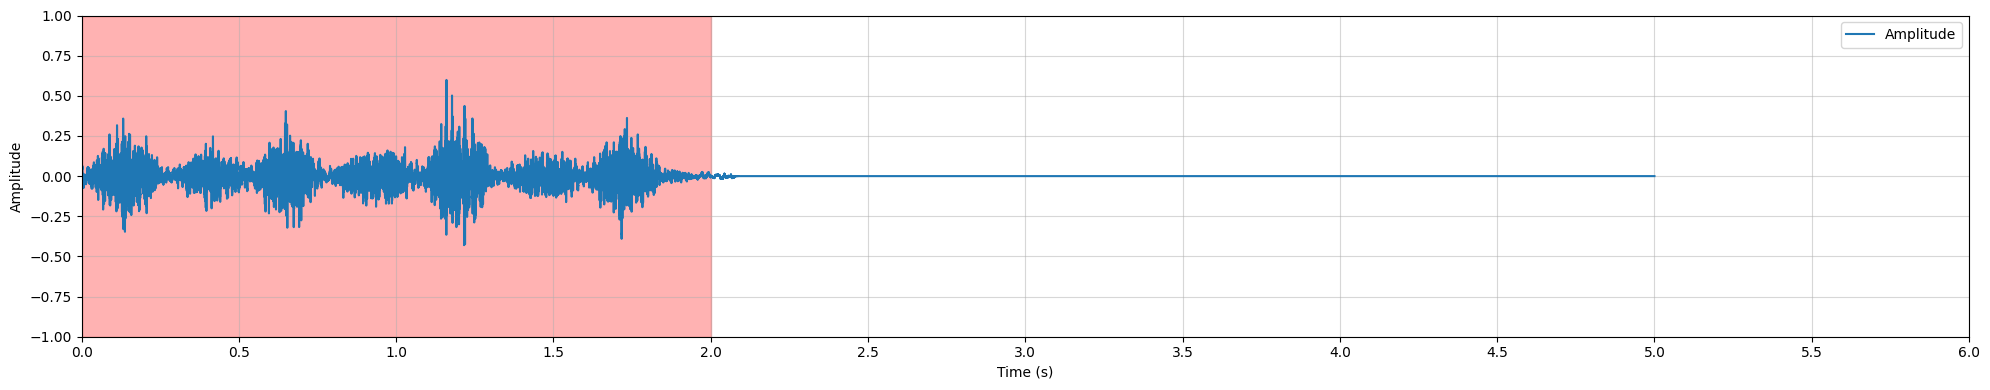

In [41]:
load_and_plot(dir_data_nad+"/1-7974-B-49.wav", [[0.0, 2.0]])

In [42]:
def label_to_segments(list_label):
    segments = []
    for label in list_label:
        start, end = label
        if end - start == 1:
            segments.append([start, end])
        else:
            current = start
            while current + 1 <= end:
                segments.append([current, current + 1])
                current += 0.5
    return segments

In [43]:
list_label_nad = [
    ("1-100032-A-0.wav", [[2.0, 3.0]]),
    ("1-100038-A-14.wav", [[0.0, 1.0]]),
    ("1-100210-A-36.wav", [[0.5, 5.0]]),
    ("1-100210-B-36.wav", [[0.0, 4.5]]),
    ("1-101296-A-19.wav", []),
    ("1-101296-B-19.wav", []),
    ("1-101336-A-30.wav", [[0.0, 3.0]]),
    ("1-101404-A-34.wav", [[0.0, 1.0]]),
    ("1-103298-A-9.wav", [[0.0, 1.0], [1.5, 2.5], [4.0, 5.0]]),
    ("1-103995-A-30.wav", [[0.0, 1.0]]),
    ("1-103999-A-30.wav", [[0.0, 1.0]]),
    ("1-104089-A-22.wav", [[0.5, 5.0]]),
    ("1-104089-B-22.wav", [[0.0, 5.0]]),
    ("1-105224-A-22.wav", [[0.0, 5.0]]),
    ("1-110389-A-0.wav", [[0.0, 1.0]]),
    ("1-110537-A-22.wav", [[0.0, 5.0]]),
    ("1-115521-A-19.wav", [[0.0, 1.0], [3.5, 4.5]]),
    ("1-115545-A-48.wav", []),
    ("1-115545-B-48.wav", [[0.0, 1.0]]),
    ("1-115545-C-48.wav", [[0.5, 1.5]]),
    ("1-115546-A-48.wav", [[0.5, 1.5]]),
    ("1-115920-B-22.wav", []),
    ("1-115921-A-22.wav", []),
    ("1-116765-A-41.wav", [[1.0, 5.0]]),
    ("1-11687-A-47.wav", [[0.0, 2.5]]),
    ("1-118206-A-31.wav", []),
    ("1-118559-A-17.wav", []),
    ("1-121951-A-8.wav", []),
    ("1-13571-A-46.wav", [[0.0, 1.0], [2.0, 3.0], [3.5, 5.0]]),
    ("1-13572-A-46.wav", [[2.0, 3.0]]),
    ("1-13613-A-37.wav", [[0.0, 5.0]]),
    ("1-137-A-32.wav", []),
    ("1-977-A-39.wav", [[0.0, 1.0]]),
    ("1-1791-A-26.wav", [[0.0, 2.0]]),
    ("1-7974-A-49.wav", [[0.0, 3.0], [3.5, 5.0]]),
    ("1-7974-B-49.wav", [[0.0, 2.0]]),
]

In [44]:
for label in list_label_nad:
    print(f"(\"{label[0]}\", {label_to_segments(label[1])}),")

("1-100032-A-0.wav", [[2.0, 3.0]]),
("1-100038-A-14.wav", [[0.0, 1.0]]),
("1-100210-A-36.wav", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
("1-100210-B-36.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5]]),
("1-101296-A-19.wav", []),
("1-101296-B-19.wav", []),
("1-101336-A-30.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0]]),
("1-101404-A-34.wav", [[0.0, 1.0]]),
("1-103298-A-9.wav", [[0.0, 1.0], [1.5, 2.5], [4.0, 5.0]]),
("1-103995-A-30.wav", [[0.0, 1.0]]),
("1-103999-A-30.wav", [[0.0, 1.0]]),
("1-104089-A-22.wav", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
("1-104089-B-22.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
("1-105224-A-22.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4

In [45]:
list_segments_nad = [
    ("1-100032-A-0.wav", [[2.0, 3.0]]),
    ("1-100038-A-14.wav", [[0.0, 1.0]]),
    ("1-100210-A-36.wav", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
    ("1-100210-B-36.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5]]),
    ("1-101296-A-19.wav", []),
    ("1-101296-B-19.wav", []),
    ("1-101336-A-30.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0]]),
    ("1-101404-A-34.wav", [[0.0, 1.0]]),
    ("1-103298-A-9.wav", [[0.0, 1.0], [1.5, 2.5], [4.0, 5.0]]),
    ("1-103995-A-30.wav", [[0.0, 1.0]]),
    ("1-103999-A-30.wav", [[0.0, 1.0]]),
    ("1-104089-A-22.wav", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
    ("1-104089-B-22.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
    ("1-105224-A-22.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
    ("1-110389-A-0.wav", [[0.0, 1.0]]),
    ("1-110537-A-22.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
    ("1-115521-A-19.wav", [[0.0, 1.0], [3.5, 4.5]]),
    ("1-115545-A-48.wav", []),
    ("1-115545-B-48.wav", [[0.0, 1.0]]),
    ("1-115545-C-48.wav", [[0.5, 1.5]]),
    ("1-115546-A-48.wav", [[0.5, 1.5]]),
    ("1-115920-B-22.wav", []),
    ("1-115921-A-22.wav", []),
    ("1-116765-A-41.wav", [[1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
    ("1-11687-A-47.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5]]),
    ("1-118206-A-31.wav", []),
    ("1-118559-A-17.wav", []),
    ("1-121951-A-8.wav", []),
    ("1-13571-A-46.wav", [[0.0, 1.0], [2.0, 3.0], [3.5, 4.5], [4.0, 5.0]]),
    ("1-13572-A-46.wav", [[2.0, 3.0]]),
    ("1-13613-A-37.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
    ("1-137-A-32.wav", []),
    ("1-977-A-39.wav", [[0.0, 1.0]]),
    ("1-1791-A-26.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0]]),
    ("1-7974-A-49.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [3.5, 4.5], [4.0, 5.0]]),
    ("1-7974-B-49.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0]]),
]

print(list_segments_nad[1])

('1-100038-A-14.wav', [[0.0, 1.0]])
